In [1]:
import os
os.chdir('src')

In [2]:
from ecoli_ts_network import *
import motiffinder as mf
import networkx as nx
import pprint
import matplotlib.pyplot as plt

In [3]:
def draw_graph(graph, **kwargs):
    axes = plt.axes((0,0,1.2,1.2))
    nx.draw(graph,with_labels=True,edge_color='gray',ax=axes,**kwargs)

def draw_subgraph(graph,nodes,**kwargs):
    draw_graph(graph.subgraph(nodes), **kwargs)

In [4]:
full_graph = open_graph()
high_ev_graph = high_evidence_graph(full_graph)

print('Graph Stats (nodes, edges)')
print('full graph', len(full_graph), full_graph.size())
print('high evidence edges only', len(high_ev_graph), high_ev_graph.size())

Graph Stats (nodes, edges)
full graph 2290 5661
high evidence edges only 1797 3174


## SIMs

In [5]:
def sims_analysis(graph):
    sims = mf.find_SIMS(graph,get_transcription_factors(graph))
    print('Raw number of SIMs', len(sims))
    sims = sorted(filter(lambda x : len(x) > 2, sims), key = lambda x : len(x))
    print('SIMs with at least 2 genes', len(sims))
    
    print('Distribution of SIM size (number of genes)')
    size_count = {}
    for s in sims:
        size = len(s) - 1
        if size not in size_count:
            size_count[size] = 0
        size_count[size] += 1
    print(size_count)
    plt.bar(size_count.keys(),size_count.values())
    
    return sims

Full Graph
Raw number of SIMs 211
SIMs with at least 2 genes 67
Distribution of SIM size (number of genes)
{2: 14, 3: 13, 4: 4, 5: 6, 6: 4, 7: 3, 8: 3, 9: 3, 10: 3, 11: 1, 12: 1, 15: 1, 20: 1, 26: 1, 28: 1, 29: 1, 33: 1, 42: 1, 53: 1, 68: 1, 101: 1, 105: 1, 117: 1}


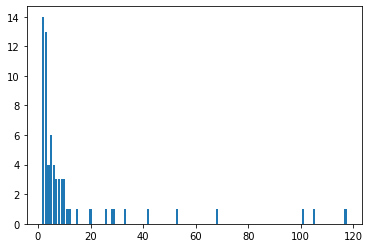

In [6]:
print('Full Graph')
full_graph_sims = sims_analysis(full_graph)

High Evidence Only
Raw number of SIMs 149
SIMs with at least 2 genes 73
Distribution of SIM size (number of genes)
{2: 17, 3: 14, 4: 8, 5: 3, 6: 10, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 1, 15: 1, 19: 1, 20: 1, 39: 1, 42: 1, 74: 2, 118: 1, 122: 1, 153: 1}


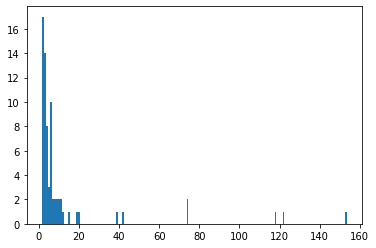

In [7]:
print('High Evidence Only')
high_ev_sims = sims_analysis(high_ev_graph)

## DORs

In [8]:
def dors_analysis(graph):
    dors = mf.find_DORs(graph)
    print('Number of (complete) DORs', len(dors))
    return dors
import itertools

In [9]:
print('Full graph')
full_graph_dors = dors_analysis(full_graph)

Full graph
Number of (complete) DORs 1


[(('arcA', 'crp'), ('lacI', 'glpR', 'mhpR'))]


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


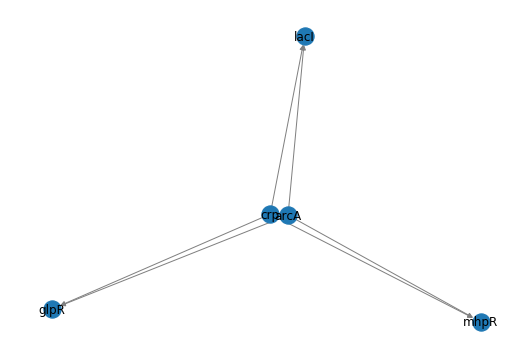

In [10]:
print(full_graph_dors)
draw_subgraph(full_graph,itertools.chain(*full_graph_dors[0]))

In [11]:
print('High evidence only')
high_ev_dors = dors_analysis(high_ev_graph)

High evidence only
Number of (complete) DORs 1


[(('arcA', 'crp'), ('glpR', 'cspA'))]


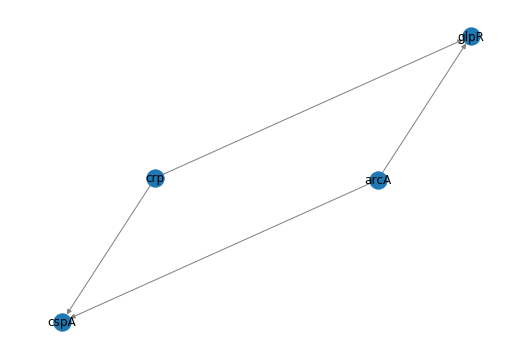

In [12]:
print(high_ev_dors)
draw_subgraph(high_ev_graph,itertools.chain(*high_ev_dors[0]))